In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Part I

In [222]:
# SETAR

N = 1000  # length of the time series

# SETAR(l, d, k1, . . . , kl )=SETAR(2;1;1) model with two regimes and one lag in each regime
l = 2  # number of regimes
d = 1  # delay parameter
k = np.array([1, 1]) # number of lags in each regime

tau = 0  # threshold
e = np.random.normal(0, 1, N)


a0 = np.array([0.0, 0.0])     # intercepts per regime
a1 = np.array([0.6, -0.5])  # AR(1) coeffs per regime

X = np.zeros(N)
J = np.zeros(N, dtype=int)
for t in range(1, N):
    j = 0 if X[t - d] <= tau else 1  # regime index (0 or 1)
    J[t] = j
    
    X[t] = a0[j] + a1[j] * X[t - 1] + e[t]  # X_t = a0^(j) + a1^(j) X_{t-1} + e_t

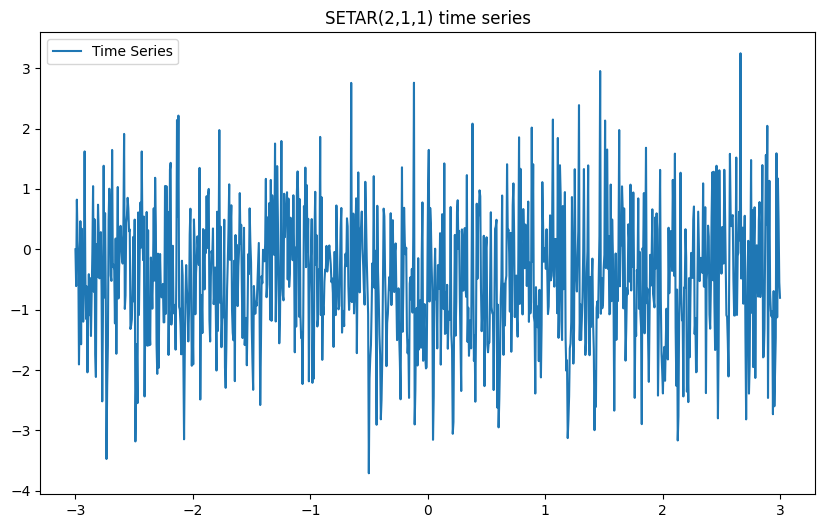

In [223]:
xs = np.linspace(-3, 3, 1000)
plt.figure(figsize=(10, 6))
plt.plot(xs, X)
plt.title("SETAR(2,1,1) time series")
plt.legend(["Time Series"])
plt.show()

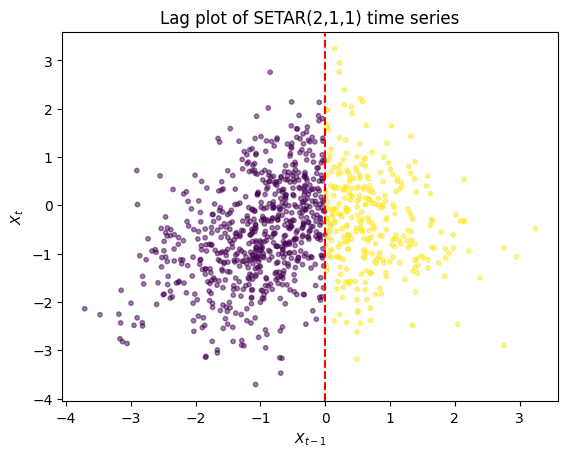

In [224]:
plt.scatter(X[:-1], X[1:], alpha=0.5, s=10, c=J[1:]) # color by regime
plt.axvline(tau, color="red", linestyle="--") # threshold line
plt.xlabel("$X_{t-1}$")
plt.ylabel("$X_t$")
plt.title("Lag plot of SETAR(2,1,1) time series")
plt.show()

In [225]:
# IGAR model

N = 1000

# IGAR(l, d, (k1, . . . , kl))=IGAR(2, 1)
l = 2 # number of regimes
d = 1 # delay parameter


# ex1
# arbitrary coefficients / probabilities for each regime
# p = np.array([.9, .1])

# a0 = np.array([.2, -.6]) # intercepts per regime
# a1 = np.array([.9, -.6]) # AR(1) coeffs per regime

# ex2
# arbitrary coefficients / probabilities for each regime
p = np.array([.5, .5])

a0 = np.array([2, 2]) # intercepts per regime
a1 = np.array([.99, 0]) # AR(1) coeffs per regime


J = np.zeros(N, dtype=int) # store regime at each time step (for coloring the lag plot)

for t in range(N):
    # pick with probability p
    j = np.random.choice(np.arange(0, l), p=p) # j is the region
    J[t] = j
    
    X[t] = a0[j] + a1[j]*X[t-1] + e[t]

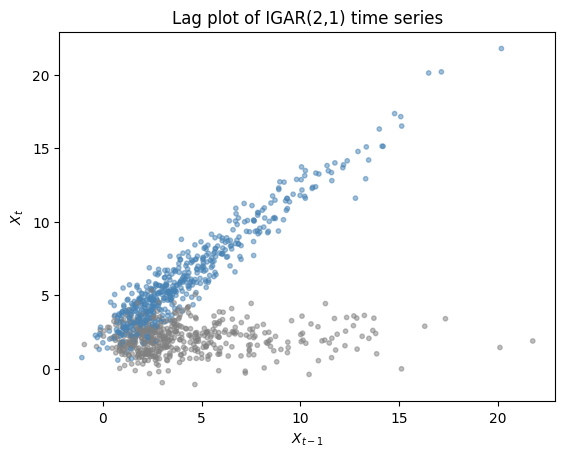

In [226]:
colors = np.array(["steelblue", "gray"])
plt.scatter(X[:-1], X[1:], alpha=0.5, s=10, c=colors[J[1:]])
plt.xlabel("$X_{t-1}$")
plt.ylabel("$X_t$")
plt.title("Lag plot of IGAR(2,1) time series")
plt.show()

In [227]:
# MMAR(l, k)=MMAR(2, 1)
# based on page 21 from the lecture notes

N = 1000
a0 = np.array([0.0, 0.0])
a1 = np.array([-.9, .9])

P = np.array([
    [0.95, 0.05],
    [0.05, 0.95]
])

e = np.random.normal(0, 1, N)
X = np.zeros(N)
S = np.zeros(N, dtype=int)

# initial state
S[0] = np.random.choice([0, 1])
X[0] = e[0]

for t in range(1, N):
    S[t] = np.random.choice([0, 1], p=P[S[t-1], :])
    X[t] = a0[S[t]] + a1[S[t]] * X[t-1] + e[t]

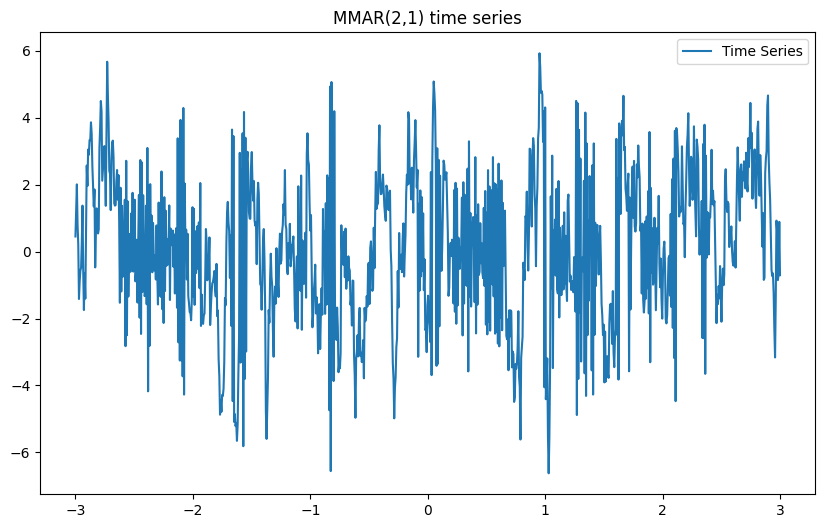

In [228]:
plt.figure(figsize=(10, 6))
plt.plot(xs, X)
plt.title("MMAR(2,1) time series")
plt.legend(["Time Series"])
plt.show()

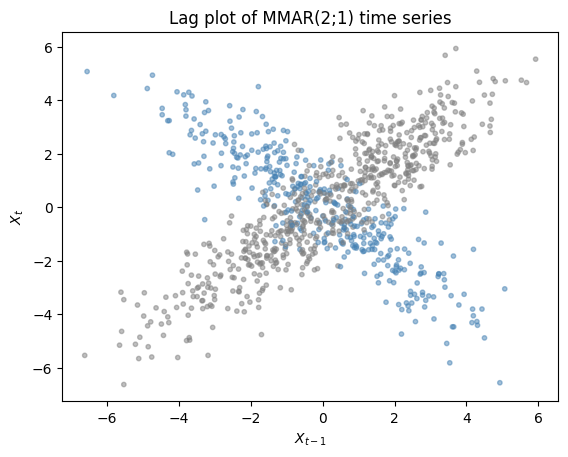

In [229]:
# regimes plotted against each other
plt.scatter(X[:-1], X[1:], alpha=0.5, s=10, c=colors[S[1:]])
plt.xlabel("$X_{t-1}$")
plt.ylabel("$X_t$")
plt.title("Lag plot of MMAR(2;1) time series")
plt.show()

In [230]:
# Code above into functions

def simulate_setar(N=1000, tau=0.0,
                   a0=np.array([0.0, 0.0]),
                   a1=np.array([0.6, -0.5]),
                   d=1, seed=None):
    """
    Simulate SETAR(2; d; 1, 1) process:
        X_t = a0[j] + a1[j] * X_{t-1} + e_t
        regime j chosen by threshold on X_{t-d}

    Parameters
    ----------
    N : int
        Length of time series
    tau : float
        Threshold
    a0 : np.ndarray
        Intercepts for each regime (length 2)
    a1 : np.ndarray
        AR(1) coefficients for each regime (length 2)
    d : int
        Delay parameter
    seed : int or None
        Random seed for reproducibility

    Returns
    -------
    X : np.ndarray
        Simulated time series
    J : np.ndarray
        Regime index sequence (0 or 1)
    """
    rng = np.random.default_rng(seed)
    e = rng.normal(0, 1, N)

    X = np.zeros(N)
    J = np.zeros(N, dtype=int)

    for t in range(1, N):
        j = 0 if X[t - d] <= tau else 1
        J[t] = j
        X[t] = a0[j] + a1[j] * X[t - 1] + e[t]

    return X, J

def simulate_igar(N=1000,
                  p=np.array([0.5, 0.5]),
                  a0=np.array([2.0, 2.0]),
                  a1=np.array([0.99, 0.0]),
                  d=1,
                  seed=None):
    """
    Simulate IGAR(2,1) process:
        X_t = a0[j] + a1[j] * X_{t-1} + e_t,
        where regime j is drawn i.i.d. with probabilities p.

    Parameters
    ----------
    N : int
        Length of time series.
    p : np.ndarray
        Probabilities of selecting each regime (length l).
    a0 : np.ndarray
        Intercepts per regime.
    a1 : np.ndarray
        AR(1) coefficients per regime.
    d : int
        Delay parameter (fixed at 1 here).
    seed : int or None
        Random seed for reproducibility.

    Returns
    -------
    X : np.ndarray
        Simulated time series.
    J : np.ndarray
        Regime indices chosen at each step.
    """
    rng = np.random.default_rng(seed)
    e = rng.normal(0, 1, N)

    l = len(p)
    X = np.zeros(N)
    J = np.zeros(N, dtype=int)

    for t in range(1, N):
        j = rng.choice(np.arange(l), p=p)  # pick regime
        J[t] = j
        X[t] = a0[j] + a1[j] * X[t - d] + e[t]

    return X, J

def simulate_mmar(N=1000,
                  a0=np.array([0.0, 0.0]),
                  a1=np.array([-0.9, 0.9]),
                  P=np.array([[0.95, 0.05],
                              [0.05, 0.95]]),
                  seed=None):
    """
    Simulate MMAR(2,1) process:
        X_t = a0[S_t] + a1[S_t] * X_{t-1} + e_t
        with regime S_t evolving as a Markov chain with transition matrix P.

    Parameters
    ----------
    N : int
        Length of time series.
    a0 : np.ndarray
        Intercepts per regime (length l).
    a1 : np.ndarray
        AR(1) coefficients per regime (length l).
    P : np.ndarray
        Transition matrix (l x l), rows sum to 1.
    seed : int or None
        Random seed for reproducibility.

    Returns
    -------
    X : np.ndarray
        Simulated time series.
    S : np.ndarray
        Sequence of regimes (state path).
    """
    rng = np.random.default_rng(seed)
    e = rng.normal(0, 1, N)

    l = len(a0)
    X = np.zeros(N)
    S = np.zeros(N, dtype=int)

    # initial state
    S[0] = rng.choice(np.arange(l))
    X[0] = e[0]

    for t in range(1, N):
        S[t] = rng.choice(np.arange(l), p=P[S[t-1]])
        X[t] = a0[S[t]] + a1[S[t]] * X[t - 1] + e[t]

    return X, S


X, J = simulate_setar(N=1000, tau=0, a0=np.array([0, 0]), a1=np.array([0.6, -0.5]), seed=42)

# Example 1
X, J = simulate_igar(N=1000,
                     p=np.array([0.9, 0.1]),
                     a0=np.array([0.2, -0.6]),
                     a1=np.array([0.9, -0.6]),
                     seed=42)

# Example 2
X2, J2 = simulate_igar(N=1000,
                       p=np.array([0.5, 0.5]),
                       a0=np.array([2, 2]),
                       a1=np.array([0.99, 0]),
                       seed=123)

X, S = simulate_mmar(
    N=1000,
    a0=np.array([0.0, 0.0]),
    a1=np.array([-0.9, 0.9]),
    P=np.array([[0.95, 0.05],
                [0.05, 0.95]]),
    seed=42
)


# Part 2

In [231]:
# Constants
N = 1000

In [232]:
# Simulate SETAR(2;1;1)
X, J = simulate_setar(N=N, tau=0, a0=np.array([1, 1]), a1=np.array([.99, -.99]), seed=42)

In [233]:
# from lecture 2, approximate conditional mean

# kernel
# k = lambda u: (1/2) if -1 < u <= 1 else 0

# vectorised kernel
def k(u):
    return .5 * ((-1 < u) & (u <= 1))

def approximate_conditional_expectation(Z, Y, y, h=0.01):
    return np.sum(k((y - Y) / h) * Z) / np.sum(k((y - Y) / h))


Z = X[1:] # responses (shifted by one)
Y = X[:-1] # predictors

# sanity check for one value
approximate_conditional_expectation(Z, Y, y = 0)

# X = X|Y
# Var(X) = E(X**2) - E(X)**2
approximate_conditional_expectation(Z**2, Y, y = 0) - approximate_conditional_expectation(Z, Y, y = 0)

2.7843486998828832

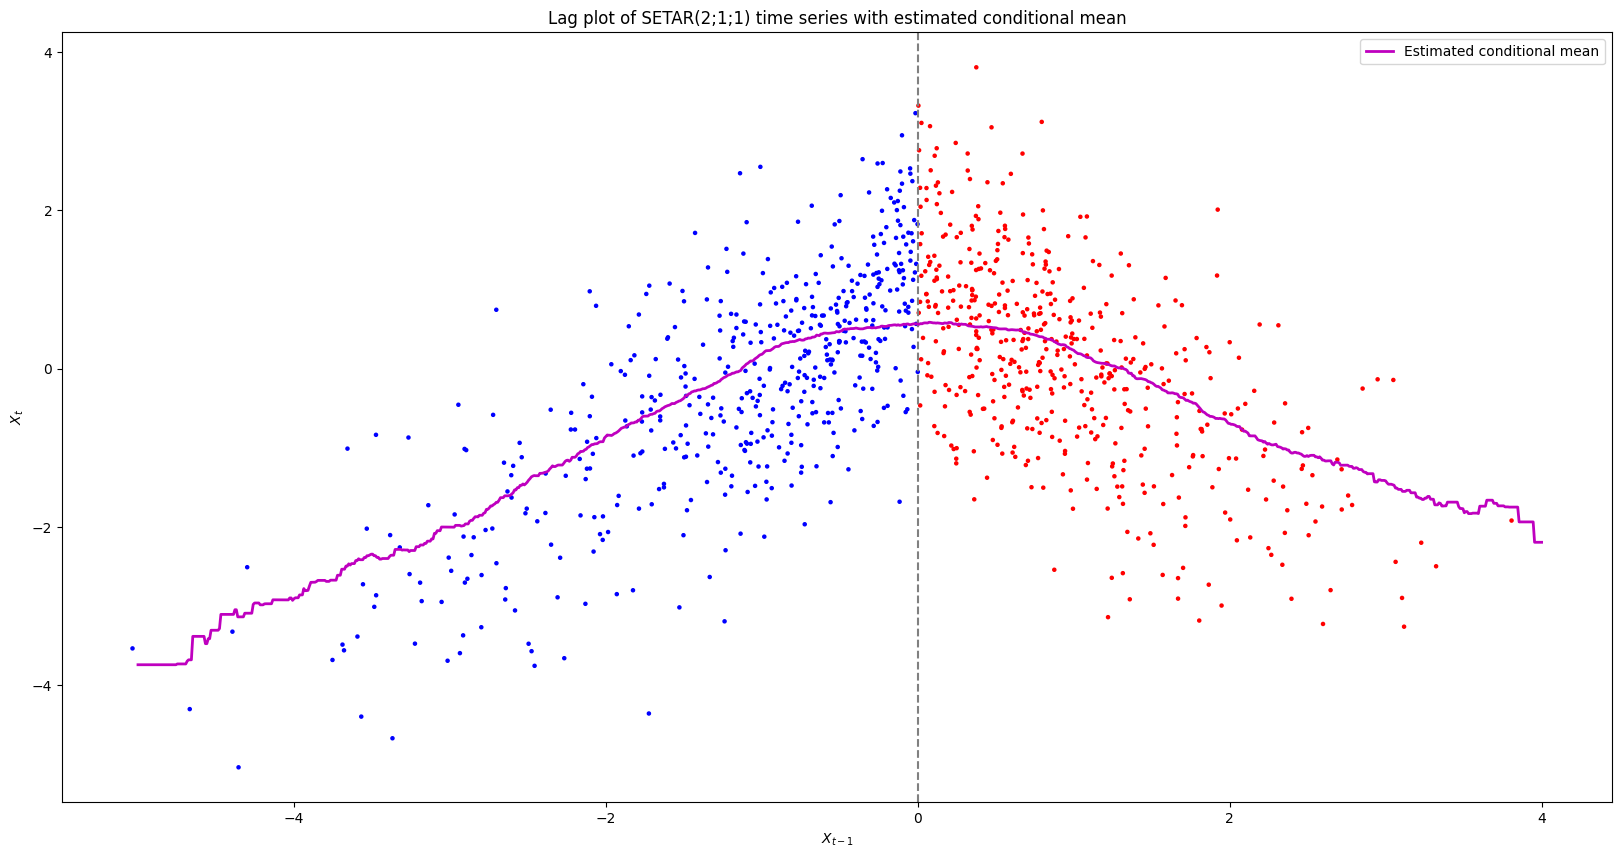

In [234]:
colors = np.array(["blue", "red"])
ys = np.linspace(-5, 4, N)
plt.figure(figsize=(20, 10))
plt.scatter(Y, Z, s=5, c=colors[J[1:]])
plt.xlabel("$X_{t-1}$")
plt.ylabel("$X_t$")
plt.axvline(tau, color="gray", linestyle="--") # threshold line
plt.title("Lag plot of SETAR(2;1;1) time series with estimated conditional mean")
plt.plot(ys, np.array(list(map(lambda y: approximate_conditional_expectation(Z, Y, y, h=1), ys))), 'm-', linewidth=2, label="Estimated conditional mean")
plt.legend()
plt.show()

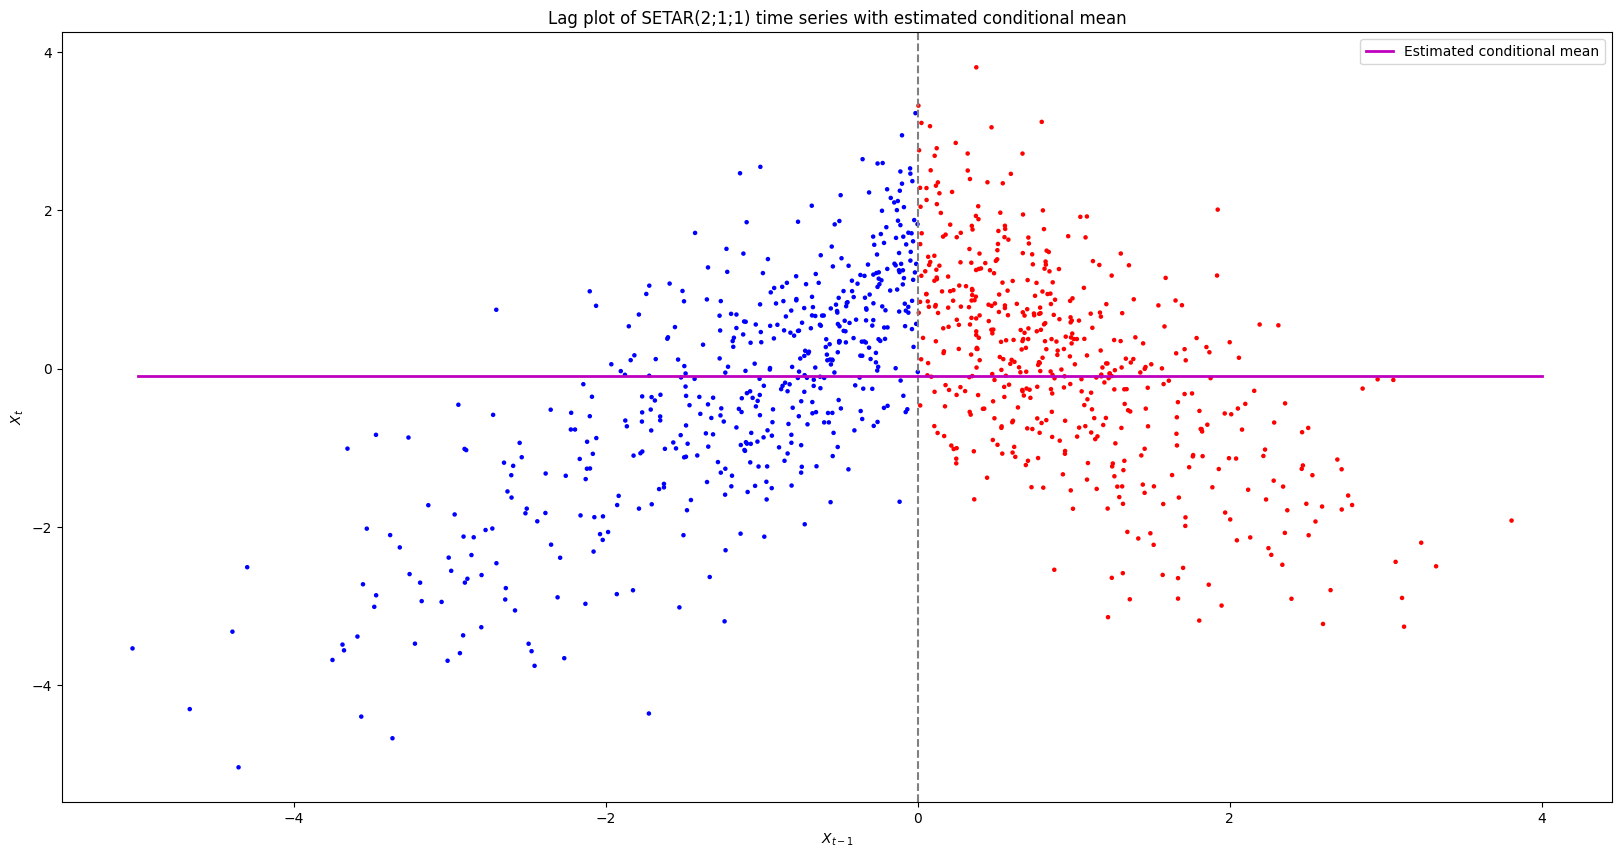

In [235]:
colors = np.array(["blue", "red"])
ys = np.linspace(-5, 4, N)
plt.figure(figsize=(20, 10))
plt.scatter(Y, Z, s=5, c=colors[J[1:]])
plt.xlabel("$X_{t-1}$")
plt.ylabel("$X_t$")
plt.axvline(tau, color="gray", linestyle="--") # threshold line
plt.title("Lag plot of SETAR(2;1;1) time series with estimated conditional mean")
plt.plot(ys, np.array(list(map(lambda y: approximate_conditional_expectation(Z, Y, y, h=10), ys))), 'm-', linewidth=2, label="Estimated conditional mean")
plt.legend()
plt.show()

/var/folders/nb/bcl7qtp16rv9lpgrryc9q4c00000gn/T/ipykernel_67410/3955772969.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(k((y - Y) / h) * Z) / np.sum(k((y - Y) / h))


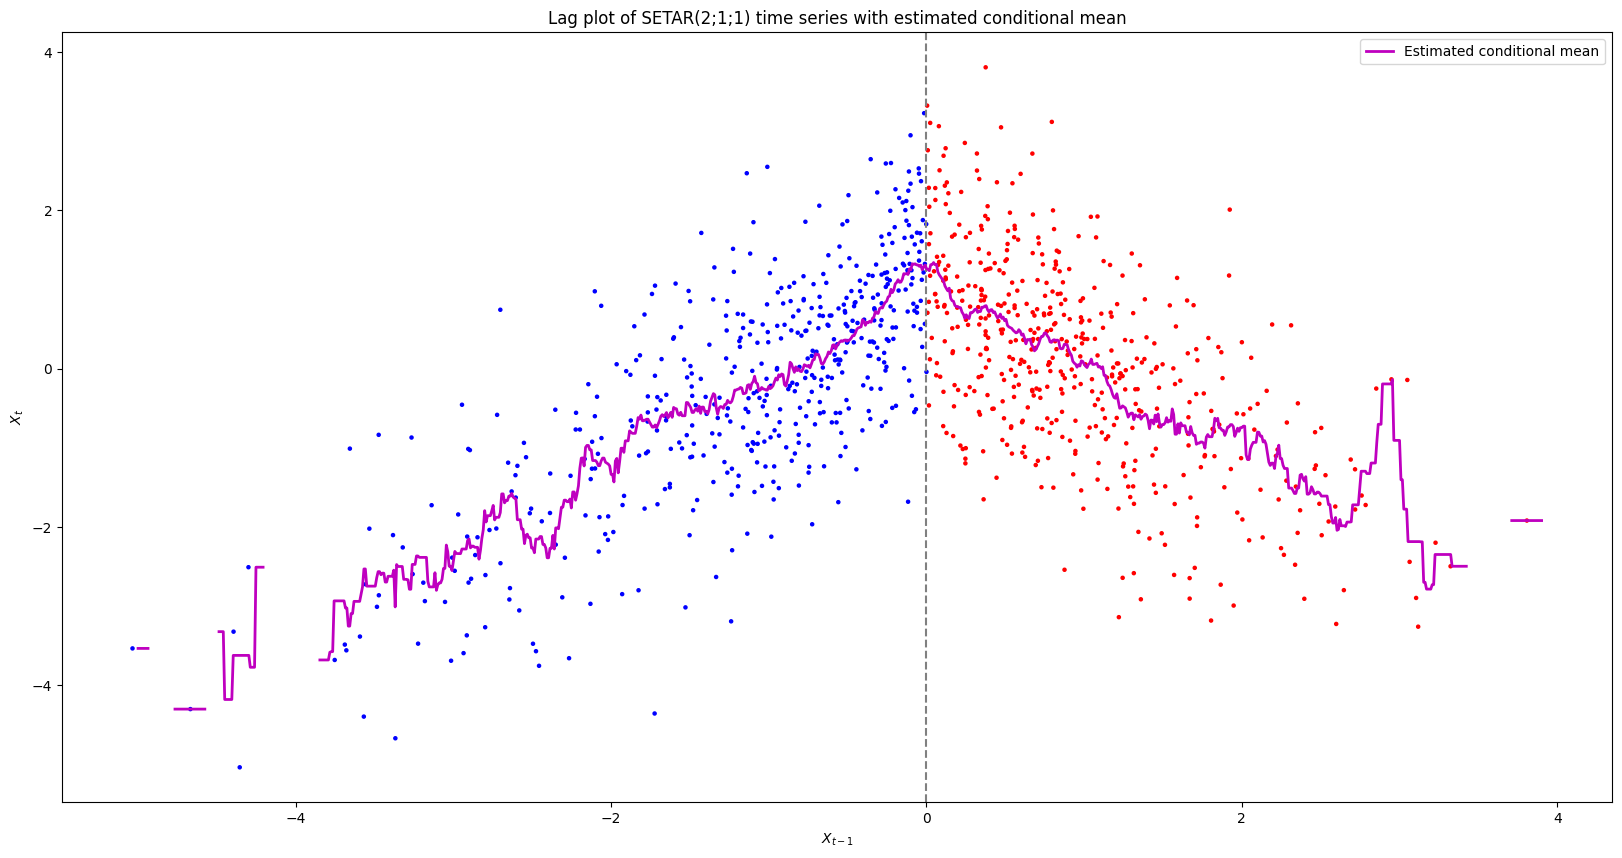

In [236]:
colors = np.array(["blue", "red"])
ys = np.linspace(-5, 4, N)
plt.figure(figsize=(20, 10))
plt.scatter(Y, Z, s=5, c=colors[J[1:]])
plt.xlabel("$X_{t-1}$")
plt.ylabel("$X_t$")
plt.axvline(tau, color="gray", linestyle="--") # threshold line
plt.title("Lag plot of SETAR(2;1;1) time series with estimated conditional mean")
plt.plot(ys, np.array(list(map(lambda y: approximate_conditional_expectation(Z, Y, y, h=.1), ys))), 'm-', linewidth=2, label="Estimated conditional mean")
plt.legend()
plt.show()

# Part 3

In [237]:
X, J = simulate_setar(N=1000, tau=0.0,
                      a0=np.array([0.0, 0.0]),
                      a1=np.array([0.99, -0.99]),
                      seed=42)

# Histogram regression (regressogram) and cumulative means
n_bin = 20
x_min, x_max = np.quantile(X[:-1], [0.01, 0.99])  # trim extremes
breaks = np.linspace(x_min, x_max, n_bin + 1)
h = np.diff(breaks)[0]

x_prev = X[:-1]
x_next = X[1:]

idx = np.digitize(x_prev, breaks) - 1
mask = (idx >= 0) & (idx < n_bin)
idx = idx[mask]; x_next = x_next[mask]

counts = np.bincount(idx, minlength=n_bin)
if np.any(counts < 5):
    print("Warning: some bins have <5 points (variance will be large).")

# per-bin conditional mean (regressogram)
lambda_i = np.array([x_next[idx == i].mean() for i in range(n_bin)])

# cumulative estimate of Λ(x) at bin-right endpoints / centers
centers = 0.5 * (breaks[:-1] + breaks[1:])
Lambda_hat = np.cumsum(lambda_i * h)


In [238]:
tau = 0.0
a0 = np.array([0.0, 0.0])
a1 = np.array([0.6, -0.5])

def M_theory(x):
    return np.where(x <= tau, a0[0] + a1[0]*x, a0[1] + a1[1]*x)

# Make a piecewise-integrated Λ(x) matching the histogram grid
def Lambda_theory(xs, x_min):
    xs = np.asarray(xs)
    L = np.empty_like(xs, dtype=float)

    # Left piece (x <= tau)
    left = xs <= tau
    L[left] = a0[0]*(xs[left]-x_min) + 0.5*a1[0]*(xs[left]**2 - x_min**2)

    # Value at tau (continuity constant)
    L_tau = a0[0]*(tau - x_min) + 0.5*a1[0]*(tau**2 - x_min**2)

    # Right piece (x > tau)
    right = ~left
    L[right] = L_tau + a0[1]*(xs[right]-tau) + 0.5*a1[1]*(xs[right]**2 - tau**2)
    return L

Lambda_th = Lambda_theory(centers, x_min=breaks[0])


<>:2: SyntaxWarning: invalid escape sequence '\L'
<>:3: SyntaxWarning: invalid escape sequence '\L'
<>:2: SyntaxWarning: invalid escape sequence '\L'
<>:3: SyntaxWarning: invalid escape sequence '\L'
/var/folders/nb/bcl7qtp16rv9lpgrryc9q4c00000gn/T/ipykernel_67410/4186658076.py:2: SyntaxWarning: invalid escape sequence '\L'
  plt.plot(centers, Lambda_th, 'k--', lw=2, label='Theoretical $\Lambda(x)$')
/var/folders/nb/bcl7qtp16rv9lpgrryc9q4c00000gn/T/ipykernel_67410/4186658076.py:3: SyntaxWarning: invalid escape sequence '\L'
  plt.step(centers, Lambda_hat, where='mid', lw=2, label='Estimated $\Lambda(x)$')


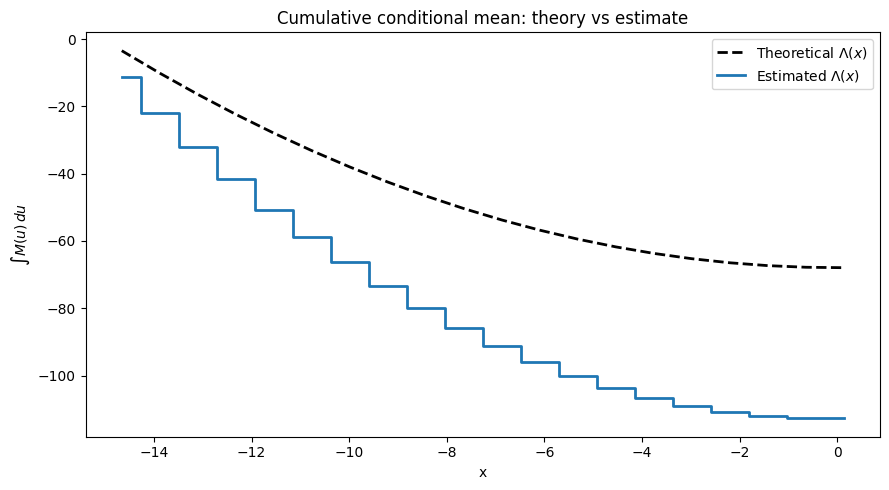

In [239]:
plt.figure(figsize=(9,5))
plt.plot(centers, Lambda_th, 'k--', lw=2, label='Theoretical $\Lambda(x)$')
plt.step(centers, Lambda_hat, where='mid', lw=2, label='Estimated $\Lambda(x)$')
plt.xlabel('x'); plt.ylabel(r'$\int M(u)\,du$')
plt.title('Cumulative conditional mean: theory vs estimate')
plt.legend(); plt.tight_layout(); plt.show()


# Part 4

In [240]:
data = np.array(pd.read_csv('DataPart4.csv'))

# columns: "Ph","Ti","Te","W"
Phi = data[:, 0]
Ti = data[:, 1]
Te = data[:, 2]
W = data[:, 3]

In [241]:
Ua = Phi / (Ti - Te)

In [242]:
e = np.random.normal(0, 1, len(Phi))
Phi_computed = Ua * (Ti-Te) + e

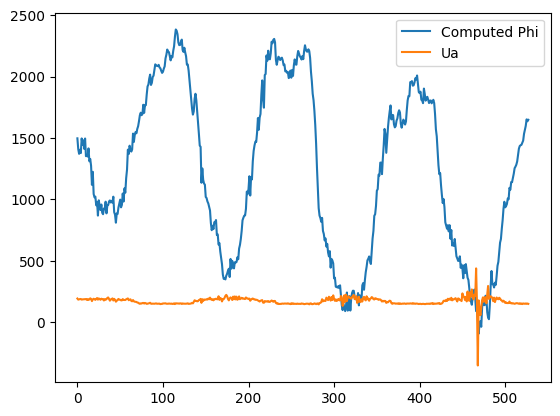

In [243]:
plt.plot(Phi_computed, label='Computed Phi')
plt.plot(Ua, label='Ua')
plt.legend()
plt.show()

In [255]:
# small frac → low bias/high variance; large frac → high bias/low variance).
fracs = [.01, .9] # small→wiggly, large→smooth

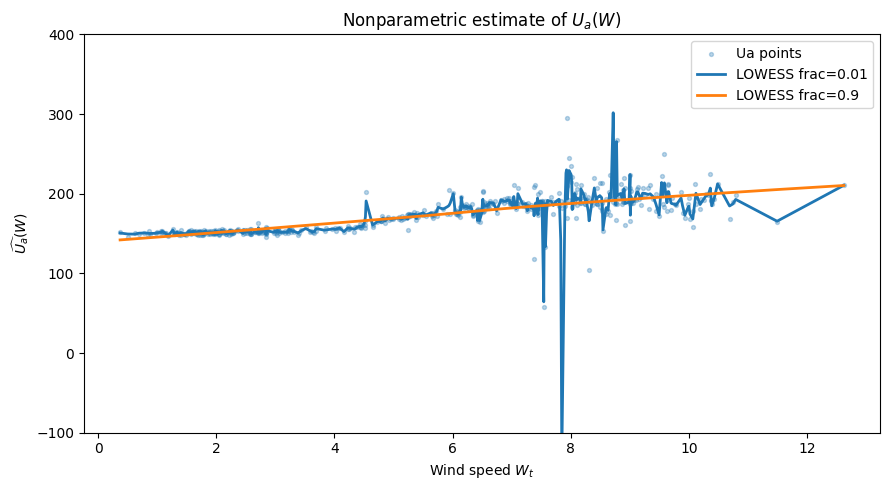

In [262]:
plt.figure(figsize=(9,5))
plt.scatter(W, Ua, s=8, alpha=0.3, label='Ua points')

# Fit local regressions Ua ~ W with different bandwidths (frac = smoothing span)
for f in fracs:
    fit = lowess(Ua, W, frac=f, it=0, return_sorted=True)  # (W_sorted, Ua_hat)
    plt.plot(fit[:,0], fit[:,1], linewidth=2, label=f'LOWESS frac={f}')

plt.xlabel('Wind speed $W_t$')
plt.ylim(-100, 400) 
plt.ylabel(r'$\widehat{U_a}(W)$')
plt.title('Nonparametric estimate of $U_a(W)$')
plt.legend()
plt.tight_layout()
plt.show()

# Part 2

ADF p-value:  0.0000  -> stationary


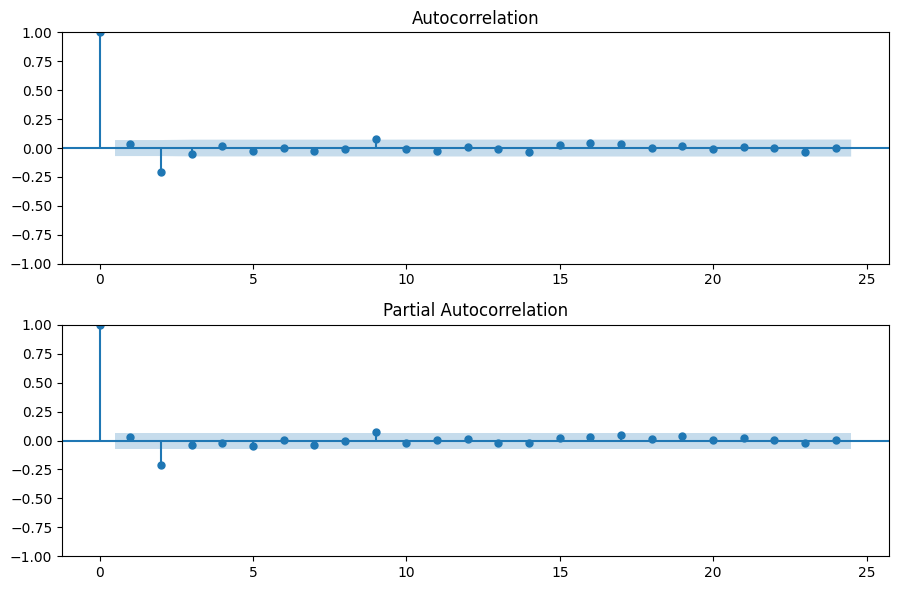

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Chosen ARMA(2,0) | BIC=3441.53, AIC=3422.79

Ljung–Box p-values:
 10    0.579716
20    0.845362
Name: lb_pvalue, dtype: float64

ARCH LM test p-value: 0.0022


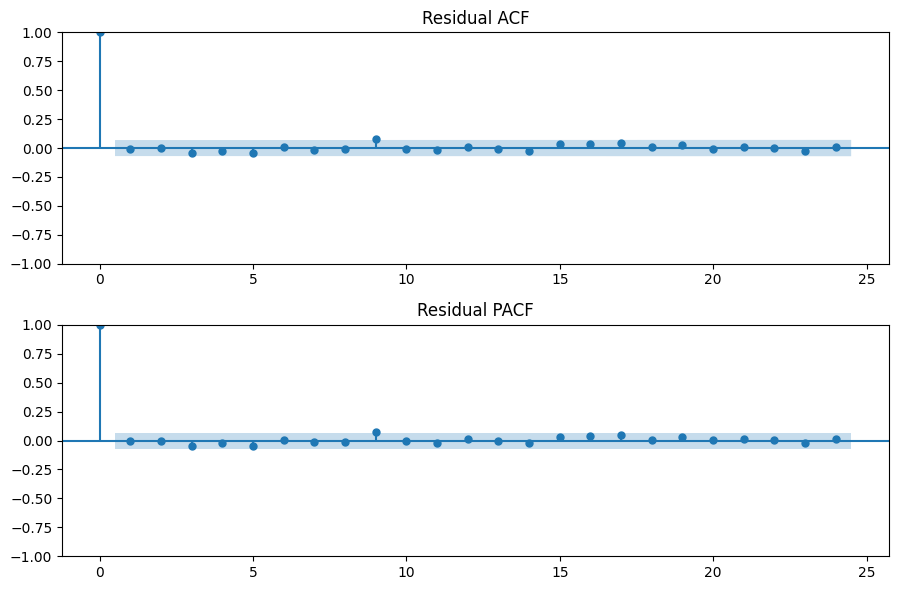

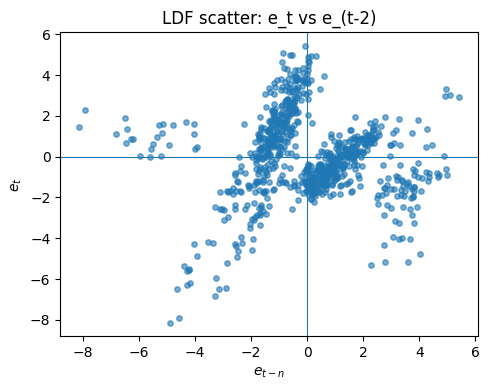

                            OLS Regression Results                            
Dep. Variable:                      e   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     14.82
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           2.14e-09
Time:                        18:49:29   Log-Likelihood:                -1681.2
No. Observations:                 798   AIC:                             3370.
Df Residuals:                     794   BIC:                             3389.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3190      0.085      3.753      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


In [5]:
# --- Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.api import OLS, add_constant

# --- 1) Load data
y = pd.read_csv("DataPart5.csv")  # column name assumed 'y'; adjust if needed
y = y.squeeze("columns").astype(float)
y = y.dropna()

# --- 2) Stationarity check (ARMA assumes stationary series)
adf_stat, adf_p, *_ = adfuller(y, autolag="AIC")
print(f"ADF p-value: {adf_p: .4f}  -> {'stationary' if adf_p<0.05 else 'non-stationary'}")
# If non-stationary, difference once and switch to ARIMA with d=1.

# --- 3) ACF/PACF to guide initial (p,q)
fig, ax = plt.subplots(2,1, figsize=(9,6))
plot_acf(y, lags=24, ax=ax[0])
plot_pacf(y, lags=24, ax=ax[1], method="ywm")
plt.tight_layout(); plt.show()

# --- 4) Small grid search for ARMA(p,q) via BIC (keep d=0 for ARMA)
def fit_arima(p,q):
    try:
        m = ARIMA(y, order=(p,0,q)).fit(method="statespace")
        return {"p":p,"q":q,"bic":m.bic,"aic":m.aic,"model":m}
    except Exception:
        return None

candidates = []
for p in range(0,4):          # widen ranges if needed
    for q in range(0,4):
        if p==0 and q==0: 
            continue
        r = fit_arima(p,q)
        if r: candidates.append(r)

best = min(candidates, key=lambda d: d["bic"])   # BIC for parsimony
m = best["model"]
print(f"Chosen ARMA({best['p']},{best['q']}) | BIC={best['bic']:.2f}, AIC={best['aic']:.2f}")

# --- 5) Residual diagnostics: whiteness and ARCH
resid = pd.Series(m.resid, index=y.index).dropna()

# Ljung–Box for no remaining autocorrelation
lb = acorr_ljungbox(resid, lags=[10, 20], return_df=True)
print("\nLjung–Box p-values:\n", lb["lb_pvalue"])

# Conditional heteroskedasticity (ARCH)
arch_stat = het_arch(resid, nlags=10)
print(f"\nARCH LM test p-value: {arch_stat[1]:.4f}")

# Residual ACF/PACF
fig, ax = plt.subplots(2,1, figsize=(9,6))
plot_acf(resid, lags=24, ax=ax[0])
plot_pacf(resid, lags=24, ax=ax[1], method="ywm")
ax[0].set_title("Residual ACF"); ax[1].set_title("Residual PACF")
plt.tight_layout(); plt.show()

# --- 6) LDF (Lagged Dependence Function) on residuals
# Pick n as the first lag with notable dependence in residual ACF (or per the hint).
n = 2  # set to the significant lag you observe (e.g., 1 or 2)
e = resid.copy()
e_lag = e.shift(n)

# Scatter e_t vs e_{t-n}
plt.figure(figsize=(5,4))
plt.scatter(e_lag, e, s=15, alpha=0.6)
plt.xlabel(r"$e_{t-n}$"); plt.ylabel(r"$e_t$")
plt.title(f"LDF scatter: e_t vs e_(t-{n})")
plt.axhline(0, lw=0.8); plt.axvline(0, lw=0.8)
plt.tight_layout(); plt.show()

# Simple linear + nonlinear dependence test: e_t ~ e_{t-n} + (e_{t-n})^2 + (e_{t-n})^3
df = pd.DataFrame({"e": e, "elag": e_lag}).dropna()
X = pd.DataFrame({
    "elag": df["elag"],
    "elag2": df["elag"]**2,
    "elag3": df["elag"]**3
})
X = add_constant(X)
ols = OLS(df["e"], X).fit()
print(ols.summary())

# Joint nonlinearity test: H0: elag2 = elag3 = 0
from statsmodels.stats.contrast import WaldTestResults
R = np.array([
    [0, 0, 1, 0],   # elag2
    [0, 0, 0, 1]    # elag3
], dtype=float)
q = np.zeros(2)
wt = ols.wald_test((R, q))
print("\nRESET-style nonlinearity (elag^2, elag^3) Wald test p-value:", wt.pvalue)

# --- 7) If LDF/ARCH shows structure, propose a better model
if lb["lb_pvalue"].iloc[-1] < 0.05:
    print("\nResiduals are autocorrelated → consider increasing p/q or trying ARMA(p,q) with seasonal terms if relevant.")
if arch_stat[1] < 0.05:
    print("ARCH effects detected → consider ARIMA + GARCH (e.g., arch package) for volatility.")
if wt.pvalue < 0.05:
    print("Nonlinear dependence detected in LDF → consider adding nonlinear terms or a nonlinear model (e.g., TAR, ARIMA with exogenous nonlinearities).")


                           AR - GARCH Model Results                           
Dep. Variable:                      x   R-squared:                       0.045
Mean Model:                        AR   Adj. R-squared:                  0.042
Vol Model:                      GARCH   Log-Likelihood:               -1698.76
Distribution:                  Normal   AIC:                           3409.51
Method:            Maximum Likelihood   BIC:                           3437.61
                                        No. Observations:                  798
Date:                Thu, Oct 02 2025   Df Residuals:                      795
Time:                        19:28:33   Df Model:                            3
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
Const          2.6237      0.153     17.171  4.409e-66    [  

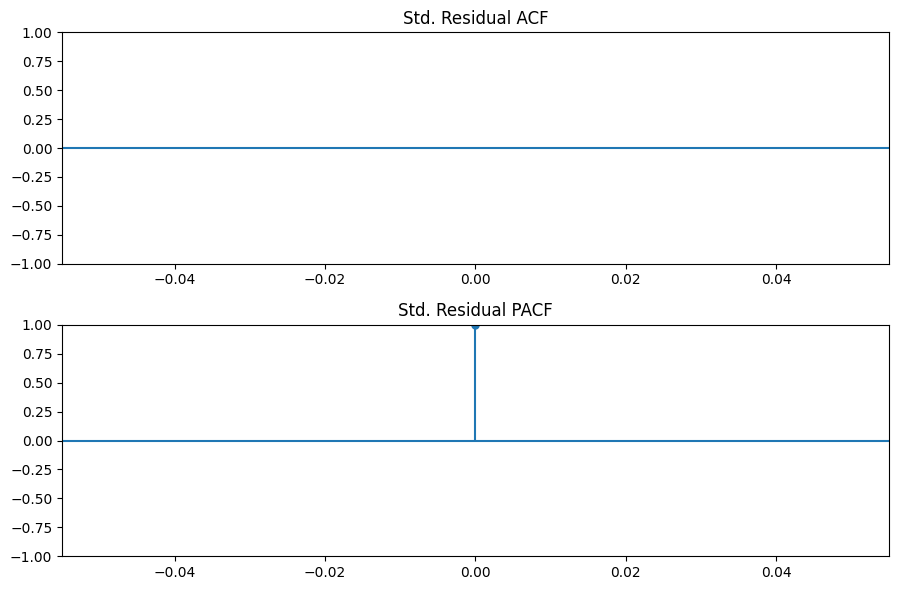

    lb_stat  lb_pvalue
10      NaN        NaN
20      NaN        NaN


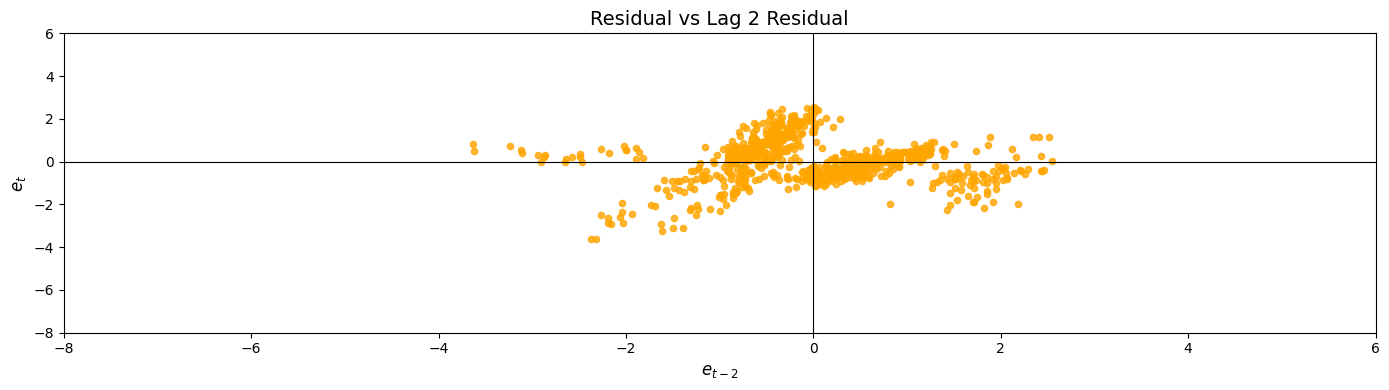

In [15]:
from arch import arch_model
import pandas as pd

# Assume your series is called y (already stationary)
# Fit ARMA(2,0)-GARCH(1,1)
model = arch_model(
    y, 
    mean="ARX", lags=2,   # AR(2) ≈ ARMA(2,0) in mean
    vol="GARCH", p=1, q=1,
    dist="normal"         # try "t" if residuals are heavy-tailed
)

res = model.fit(disp="off")
print(res.summary())

# --- Diagnostics ---
# Standardized residuals
resid = res.resid / res.conditional_volatility

# Plot residual ACF/PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize=(9,6))
plot_acf(resid, lags=24, ax=ax[0])
plot_pacf(resid, lags=24, ax=ax[1], method="ywm")
ax[0].set_title("Std. Residual ACF")
ax[1].set_title("Std. Residual PACF")
plt.tight_layout(); plt.show()

# Ljung-Box test on standardized residuals
from statsmodels.stats.diagnostic import acorr_ljungbox
print(acorr_ljungbox(resid, lags=[10,20], return_df=True))



# --- 6) LDF (Lagged Dependence Function) on residuals
# Pick n as the first lag with notable dependence in residual ACF (or per the hint).
n = 2  # set to the significant lag you observe (e.g., 1 or 2)
e = resid.copy()
e_lag = e.shift(n)

# # Scatter e_t vs e_{t-n}
# plt.figure(figsize=(10,8))
# plt.scatter(e_lag, e, s=15, alpha=0.6)
# plt.xlabel(r"$e_{t-n}$"); plt.ylabel(r"$e_t$")
# plt.xlim(-8, 6)
# plt.title(f"LDF scatter: e_t vs e_(t-{n})")
# plt.axhline(0, lw=0.8); plt.axvline(0, lw=0.8)
# plt.tight_layout(); plt.show()


# Scatter e_t vs e_{t-n} with wide style
plt.figure(figsize=(14,4))  # wider and flatter
plt.scatter(e_lag, e, s=20, alpha=0.8, color="orange")
plt.xlabel(r"$e_{t-2}$", fontsize=12)
plt.ylabel(r"$e_t$", fontsize=12)
plt.title("Residual vs Lag 2 Residual", fontsize=14)
plt.axhline(0, lw=0.8, color="black")
plt.axvline(0, lw=0.8, color="black")
plt.xlim(-8, 6)
plt.ylim(-8, 6)
plt.tight_layout()
plt.show()

